In [ ]:
!gdown https://drive.google.com/uc?id=1s0dpleDTUl5S4b9fGuSorzHp9XnDR_Kf
!7z x animal_data.zip

Downloading...
From (original): https://drive.google.com/uc?id=1s0dpleDTUl5S4b9fGuSorzHp9XnDR_Kf
From (redirected): https://drive.google.com/uc?id=1s0dpleDTUl5S4b9fGuSorzHp9XnDR_Kf&confirm=t&uuid=817caa30-1cfb-4df5-adc8-874c6d57fe2a
To: /content/animal_data.zip
100% 38.9M/38.9M [00:00<00:00, 123MB/s] 

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 38922825 bytes (38 MiB)

Extracting archive: animal_data.zip
--
Path = animal_data.zip
Type = zip
Physical Size = 38922825

  0%    
Would you like to replace the existing file:
  Path:     ./__MACOSX/._animal_data
  Size:     212 bytes (1 KiB)
  Modified: 2024-12-11 17:36:57
with the file from archive:
  Path:     __MACOSX/._animal_data
  Size:     212 bytes (1 KiB)
  Modified: 2024-12-11 17:36:57
? (Y)es / (N

{'Horse': 0, 'Tiger': 1, 'Panda': 2, 'Cow': 3, 'Elephant': 4, 'Kangaroo': 5, 'Deer': 6, 'Dog': 7, 'Zebra': 8, 'Lion': 9, 'Bird': 10, 'Dolphin': 11, 'Bear': 12, 'Cat': 13, 'Giraffe': 14}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 191s 4s/step - accuracy: 0.1017 - loss: 3.2103 - val_accuracy: 0.2057 - val_loss: 2.5868
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.1903 - loss: 2.5127 - val_accuracy: 0.2699 - val_loss: 2.2865
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - accuracy: 0.3148 - loss: 2.2013 - val_accuracy: 0.4113 - val_loss: 2.0049
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 184s 4s/step - accuracy: 0.4456 - loss: 1.8227 - val_accuracy: 0.5501 - val_loss: 1.6069
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.6188 - loss: 1.3062 - val_accuracy: 0.5553 - val_loss: 1.6179
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.7486 - loss: 0.8775 - val_accuracy: 0.7198 - val_loss: 1.3887
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.8175 - loss: 0.6158 - val_accuracy: 0.6555 - val_loss: 1.6795
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.8411 - loss: 0.5723 - val_accuracy: 0.7455 - v

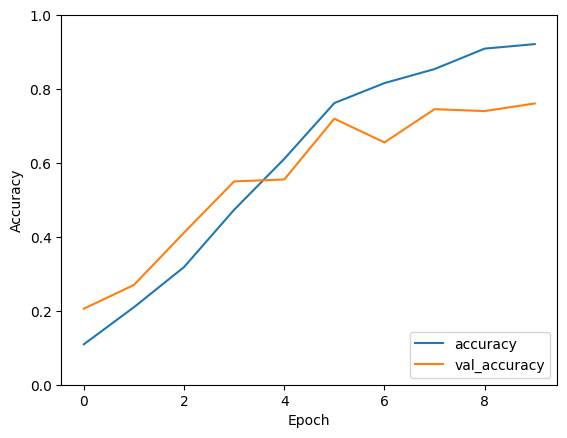

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 934ms/step
Manually Calculated Accuracy: 76.09%


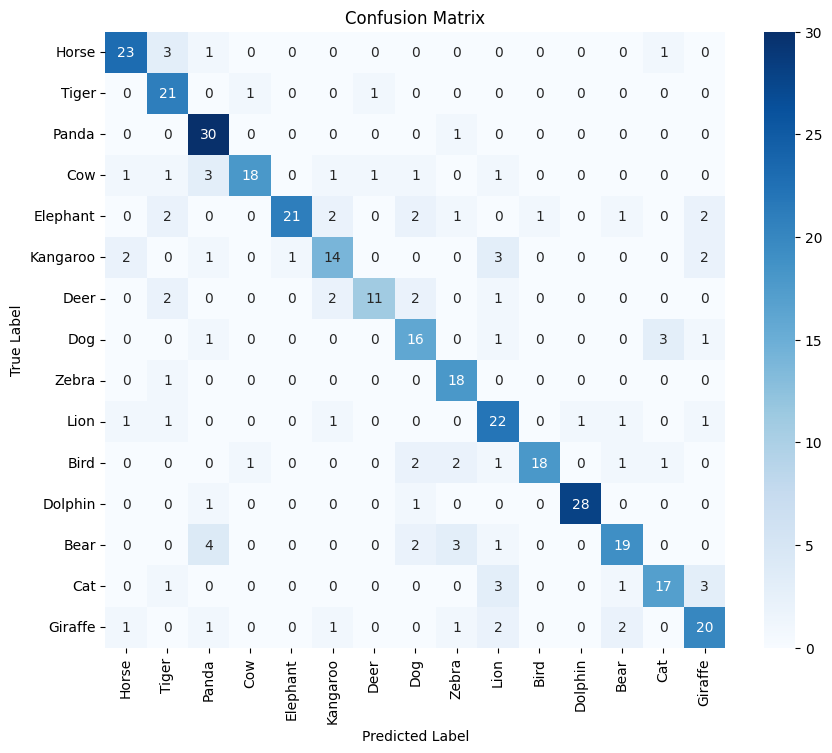

Manually Calculated Weighted Average F1 Score: 0.7560


In [ ]:
import os
import cv2  # To read images
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

dataset_path = r'/content/animal_data'
class_names = os.listdir(dataset_path)
class_map = {class_name: i for i, class_name in enumerate(class_names)}
print(class_map)

# Initialize lists to hold images and labels
x_data = []
y_labels = []

# Iterate through each folder (class) and load images
for class_name in class_names:
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):

        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)

            image = cv2.imread(image_path)

            image = cv2.resize(image, (224, 224))

            image = img_to_array(image) / 255.0

            x_data.append(image)
            y_labels.append(class_map[class_name])


# Convert lists to numpy arrays
x_data = np.array(x_data)
y_labels = np.array(y_labels)

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.2, random_state=42)


# Define the CNN model architecture
model = Sequential()

# 1st Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(len(class_names), activation='softmax'))
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(class_names))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(class_names))

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test data and print the test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

model.save('my_model.keras')  # Save the entire model


#Make predictions on the test data
predictions = model.predict(x_test)

# Convert predictions to class labels (take the index of the highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded y_test to class labels
true_labels = np.argmax(y_test, axis=1)

# Manually calculate accuracy
correct_predictions = 0
for pred, true in zip(predicted_labels, true_labels):
    if pred == true:
        correct_predictions += 1

manual_accuracy = correct_predictions / len(true_labels)
print(f"Manually Calculated Accuracy: {manual_accuracy * 100:.2f}%")


# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



# Function to calculate Precision, Recall and F1 Score for each class
def calculate_f1_score(true_labels, predicted_labels, num_classes):
    # Initialize arrays to store the precision, recall, and f1 scores for each class
    precision = np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1_scores = np.zeros(num_classes)

    # Calculate Precision, Recall, and F1 Score for each class
    for i in range(num_classes):
        TP = np.sum((true_labels == i) & (predicted_labels == i))  # True Positive
        FP = np.sum((true_labels != i) & (predicted_labels == i))  # False Positive
        FN = np.sum((true_labels == i) & (predicted_labels != i))  # False Negative

        # Calculate Precision and Recall
        precision[i] = TP / (TP + FP) if TP + FP != 0 else 0
        recall[i] = TP / (TP + FN) if TP + FN != 0 else 0

        # Calculate F1 Score
        if precision[i] + recall[i] != 0:
            f1_scores[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
        else:
            f1_scores[i] = 0

    # Calculate the average F1 score (Weighted average)
    weighted_f1 = np.mean(f1_scores)
    return precision, recall, f1_scores, weighted_f1


# Calculate F1 score for the test set
precision, recall, f1_scores, weighted_f1 = calculate_f1_score(true_labels, predicted_labels, len(class_names))

# Print the weighted F1 score
print(f'Manually Calculated Weighted Average F1 Score: {weighted_f1:.4f}')


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model


# Function to predict the class probabilities for an image
def predict_image_class(img_path):

    model = load_model('my_model.keras')
    dataset_path = r'/content/animal_data'
    class_names = os.listdir(dataset_path)
    # Load the image with the target size (224x224)
    img = image.load_img(img_path, target_size=(224, 224))

    # Convert the image to a numpy array and normalize
    img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]

    # Reshape the image to match the model's input shape (batch size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)  # Adding batch dimension

    # Get model predictions (probabilities) using the softmax output
    predictions = model.predict(img_array)

    # Flatten the prediction output and print probabilities for each class
    for idx, prob in enumerate(predictions[0]):
        print(f'{class_names[idx]}: {prob:.4f}')


#inpuit image_path
img_path = r'/content/animal_data/Kangaroo/Kangaroo_1.jpg'

# Call the function to print class probabilities
predict_image_class(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Horse: 0.0002
Tiger: 0.0008
Panda: 0.0001
Cow: 0.0002
Elephant: 0.0000
Kangaroo: 0.9082
Deer: 0.0011
Dog: 0.0029
Zebra: 0.0000
Lion: 0.0002
Bird: 0.0676
Dolphin: 0.0085
Bear: 0.0100
Cat: 0.0002
Giraffe: 0.0000
